In [2]:
#Import standard data science, machine learning and data analytics libraries and packages
import numpy as np
import pandas as pd
from pandas import Series, DataFrame
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
import pylab
from pylab import rcParams
import statsmodels.api as sm
import statistics
from scipy import stats
import sklearn
from sklearn import preprocessing
from sklearn.model_selection import train_test_split
from sklearn import metrics

In [6]:
#load dataframe
df= pd.read_csv(r'C:\Users\dholl\Desktop\churn_clean.csv')

In [7]:
#Drop unnecessary columns
df= df.drop(columns= ['City', 'State','County','Zip','Lat','Lng',
                   'Population', 'Area', 'TimeZone', 'Job', 'Marital', 'Outage_sec_perweek', 'Email', 'Contacts', 'Yearly_equip_failure', 'Techie', 'Contract', 'Port_modem', 'Tablet', 
                   'InternetService', 'Phone', 'Multiple', 'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport', 'StreamingMovies', 'PaperlessBilling', 
                   'Tenure', 'MonthlyCharge', 'Item1', 'Item2', 'Item3', 'Item4', 'Item5', 'Item6', 'Item7', 'Item8','PaymentMethod','UID','CaseOrder', 'Customer_id', 'Interaction'])

In [8]:
df.describe()

,Children,Age,Income,Bandwidth_GB_Year
count,10000.0000,10000.000000,10000.000000,10000.000000
mean,2.0877,53.078400,39806.926771,3392.341550
std,2.1472,20.698882,28199.916702,2185.294852
min,0.0000,18.000000,348.670000,155.506715
25%,0.0000,35.000000,19224.717500,1236.470827
50%,1.0000,53.000000,33170.605000,3279.536903
75%,3.0000,71.000000,53246.170000,5586.141370
max,10.0000,89.000000,258900.700000,7158.981530


In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 7 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Children           10000 non-null  int64  
 1   Age                10000 non-null  int64  
 2   Income             10000 non-null  float64
 3   Gender             10000 non-null  object 
 4   Churn              10000 non-null  object 
 5   StreamingTV        10000 non-null  object 
 6   Bandwidth_GB_Year  10000 non-null  float64
dtypes: float64(2), int64(2), object(3)
memory usage: 547.0+ KB


In [10]:
# Discover missing data points within dataset
df_nulls = df.isnull().sum()
print(df_nulls)

Children             0
Age                  0
Income               0
Gender               0
Churn                0
StreamingTV          0
Bandwidth_GB_Year    0
dtype: int64


In [11]:
print(df)

      Children  Age    Income  Gender Churn StreamingTV  Bandwidth_GB_Year
0            0   68  28561.99    Male    No          No         904.536110
1            1   27  21704.77  Female   Yes         Yes         800.982766
2            4   50   9609.57  Female    No          No        2054.706961
3            1   48  18925.23    Male    No         Yes        2164.579412
4            0   83  40074.19    Male   Yes         Yes         271.493436
...        ...  ...       ...     ...   ...         ...                ...
9995         3   23  55723.74    Male    No          No        6511.252601
9996         4   48  34129.34    Male    No         Yes        5695.951810
9997         1   48  45983.43  Female    No          No        4159.305799
9998         1   39  16667.58    Male    No         Yes        6468.456752
9999         1   28   9020.92    Male    No          No        5857.586167

[10000 rows x 7 columns]


In [12]:
#Create churn dummy variable
df['churn_dummy'] = [1 if v == 'Yes' else 0 for v in df['Churn']]

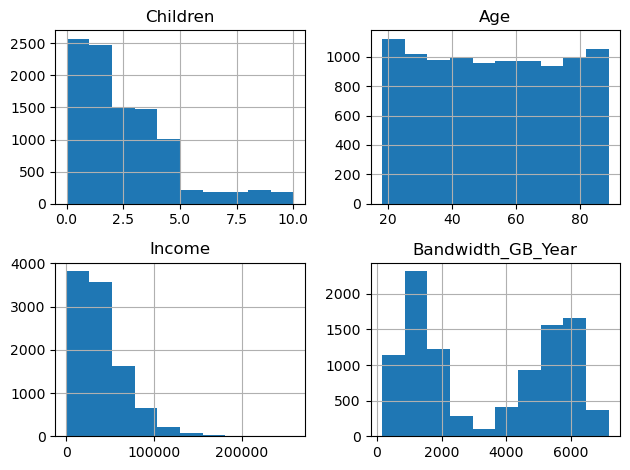

In [13]:
#Create univariate visualization ---histogram
df[['Children', 'Age', 'Income','Bandwidth_GB_Year']].hist()
plt.tight_layout()

In [14]:
# List features for analysis
features = (list(df.columns[:-1]))
print('Features for analysis include: \n', features)

Features for analysis include: 
 ['Children', 'Age', 'Income', 'Gender', 'Churn', 'StreamingTV', 'Bandwidth_GB_Year']


In [15]:
# Extract Clean dataset
df = pd.read_csv(r'C:\Users\dholl\Desktop\churn_prepared.xls')
print(df)

      Unnamed: 0  CaseOrder Customer_id                           Interaction  \
0              0          1     K409198  aa90260b-4141-4a24-8e36-b04ce1f4f77b   
1              1          2     S120509  fb76459f-c047-4a9d-8af9-e0f7d4ac2524   
2              2          3     K191035  344d114c-3736-4be5-98f7-c72c281e2d35   
3              3          4      D90850  abfa2b40-2d43-4994-b15a-989b8c79e311   
4              4          5     K662701  68a861fd-0d20-4e51-a587-8a90407ee574   
...          ...        ...         ...                                   ...   
9955        9995       9996     M324793  45deb5a2-ae04-4518-bf0b-c82db8dbe4a4   
9956        9996       9997     D861732  6e96b921-0c09-4993-bbda-a1ac6411061a   
9957        9997       9998     I243405  e8307ddf-9a01-4fff-bc59-4742e03fd24f   
9958        9998       9999     I641617  3775ccfc-0052-4107-81ae-9657f81ecdf3   
9959        9999      10000      T38070  9de5fb6e-bd33-4995-aec8-f01d0172a499   

                           

In [25]:
#Perform Decision Tree Analysis
import numpy as np
import pandas as pd
from sklearn.tree import DecisionTreeRegressor
from sklearn.model_selection import train_test_split

# Load the data
df = pd.read_csv(r'C:\Users\dholl\Desktop\churn_prepared.xls')
df['churn_dummy'] = [1 if v == 'Yes' else 0 for v in df['Churn']]

# Create feature and target arrays
X = df[['Children', 'Age', 'Income', 'Bandwidth_GB_Year']].values
y = df['churn_dummy'].astype(int)

# Split data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Fit decision tree regression model to training data
regressor = DecisionTreeRegressor(random_state=42)
regressor.fit(X_train, y_train)

# Predict on test data
y_pred = regressor.predict(X_test)

from sklearn.metrics import mean_squared_error, r2_score


# Calculate MSE
mse = mean_squared_error(y_test, y_pred)

# Model Accuracy, how often is the classifier correct?
print("Accuracy:",metrics.accuracy_score(y_test, y_pred))


print(f"MSE: {mse:.2f}")


Accuracy: 0.6892570281124498
MSE: 0.31


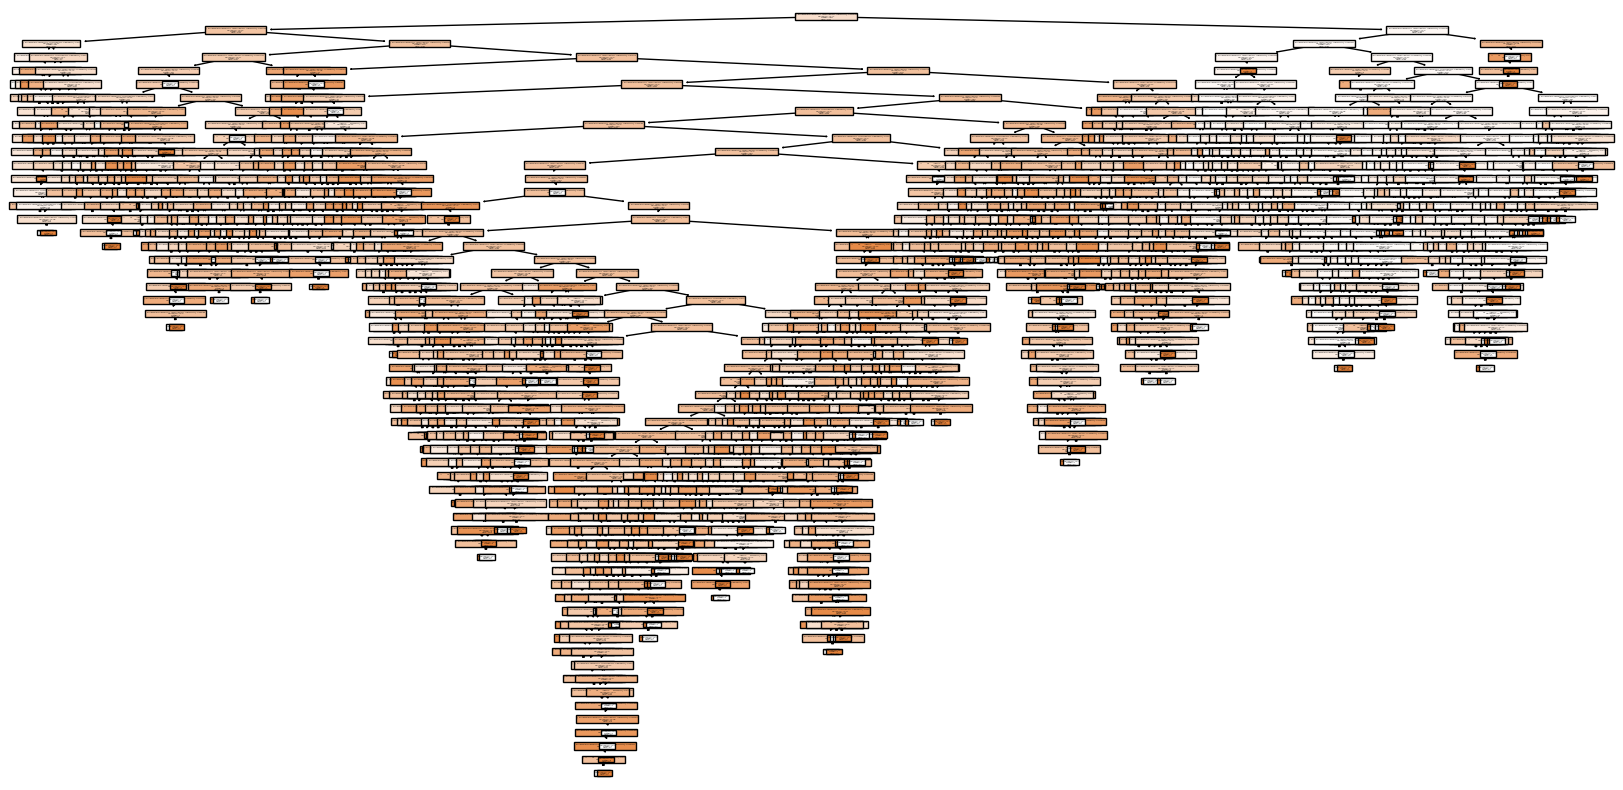

In [18]:
from sklearn.tree import plot_tree
import matplotlib.pyplot as plt
import numpy as np

# Visualize decision tree
plt.figure(figsize=(20,10))
plot_tree(regressor, filled=True, feature_names=X);
plt.show()
